In [107]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [108]:
train=pd.read_csv('/Users/ASUS/PycharmProjects/JupyterProject1/titanic (1)/train.csv')

test=pd.read_csv('/Users/ASUS/PycharmProjects/JupyterProject1/titanic (1)/test.csv')

test_passenger_ids = test['PassengerId']

In [109]:
# Add Survived column to test (for concatenation)
test['Survived'] = np.nan

# Combine datasets
full_data = pd.concat([train, test], sort=False).reset_index(drop=True)

# Preview
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [111]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [112]:
full_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [113]:
full_data['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [114]:
full_data['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64

In [115]:
full_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [116]:
full_data['Pclass'].value_counts(ascending=False)

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

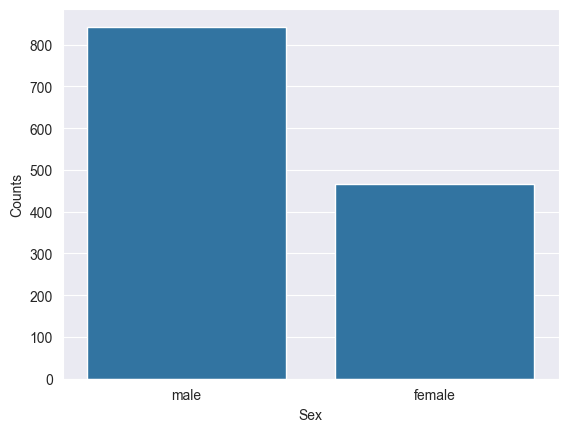

In [118]:
sns.countplot(x=full_data['Sex'],data=full_data)
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

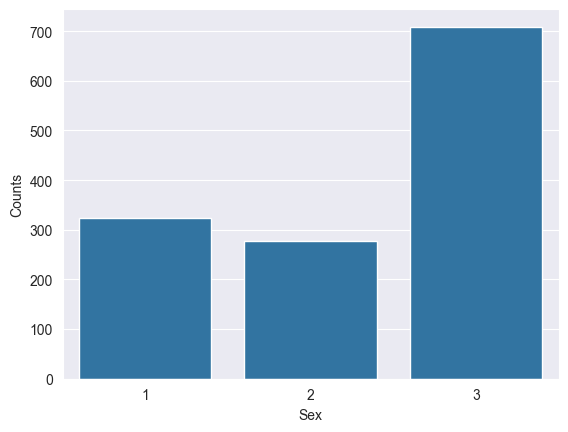

In [119]:
sns.countplot(x=full_data['Pclass'],data=full_data)
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.legend

In [120]:
# Title from Name
full_data['Title'] = full_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
full_data['Title'] = full_data['Title'].replace(['Lady', 'Countess','Capt','Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
full_data['Title'] = full_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Family Size and IsAlone
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1
full_data['IsAlone'] = (full_data['FamilySize'] == 1).astype(int)

# Deck from Cabin
full_data['Deck'] = full_data['Cabin'].str[0]
full_data['Deck'] = full_data['Deck'].fillna('U')  # Unknown

# Ticket Group Size (count how many have the same ticket)
ticket_counts = full_data['Ticket'].value_counts()
full_data['TicketGroupSize'] = full_data['Ticket'].map(ticket_counts)

# Fare Binning
full_data['FareBin'] = pd.qcut(full_data['Fare'], 4, labels=False)

# Age Binning (temporarily fill NA with median to bin; we’ll impute better later)
age_median = full_data['Age'].median()
full_data['AgeBin'] = pd.qcut(full_data['Age'].fillna(age_median), 4, labels=False)

# Sex x Pclass interaction
full_data['Sex_Pclass'] = full_data['Sex'].astype(str) + "_" + full_data['Pclass'].astype(str)


In [121]:
full_data[['Name', 'Title', 'FamilySize', 'IsAlone', 'Deck', 'TicketGroupSize', 'FareBin', 'AgeBin', 'Sex_Pclass']].head()

# Fill Embarked with mode
full_data['Embarked'] = full_data['Embarked'].fillna(full_data['Embarked'].mode()[0])

# Fill Fare based on Pclass and Embarked groups
full_data['Fare'] = full_data.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))

from sklearn.ensemble import RandomForestRegressor

# Features to predict Age
age_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize']

# Encode categorical features temporarily
age_df = full_data[age_features + ['Age']].copy()
age_df['Sex'] = age_df['Sex'].map({'male': 0, 'female': 1})
age_df['Embarked'] = age_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
age_df['Title'] = age_df['Title'].astype('category').cat.codes

# Split into known and unknown Age
known_age = age_df[age_df['Age'].notnull()]
unknown_age = age_df[age_df['Age'].isnull()]

# Train RF Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(known_age.drop('Age', axis=1), known_age['Age'])

# Predict missing Age
predicted_ages = rfr.predict(unknown_age.drop('Age', axis=1))

# Fill Age back
full_data.loc[full_data['Age'].isnull(), 'Age'] = predicted_ages


In [122]:

# full_data['Deck'] = full_data['Cabin'].str[0].fillna('U')
full_data['NumCabins'] = full_data['Cabin'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

In [123]:
import re

def extract_cabin_num(cabin):
    if pd.isnull(cabin):
        return 0
    numbers = re.findall(r'(\d+)', cabin)
    return int(numbers[0]) if numbers else 0

full_data['CabinNumber'] = full_data['Cabin'].apply(extract_cabin_num)


In [124]:
full_data[['Cabin', 'Deck', 'NumCabins', 'CabinNumber']].head(10)


,Cabin,Deck,NumCabins,CabinNumber
0,NaN,U,0,0
1,C85,C,1,85
2,NaN,U,0,0
3,C123,C,1,123
4,NaN,U,0,0
5,NaN,U,0,0
6,E46,E,1,46
7,NaN,U,0,0
8,NaN,U,0,0
9,NaN,U,0,0


In [125]:
full_data['Cabin'].isnull().sum()

np.int64(1014)

In [126]:
full_data.drop(columns=['Cabin'], inplace=True)

In [127]:
full_data.isnull().sum()


PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
IsAlone              0
Deck                 0
TicketGroupSize      0
FareBin              1
AgeBin               0
Sex_Pclass           0
NumCabins            0
CabinNumber          0
dtype: int64

In [128]:
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].median())


In [129]:
full_data['FareBin'].isnull().sum()


np.int64(1)

In [130]:
# Use rank to avoid duplicate bin edges
fare_ranks = full_data['Fare'].rank(method='min')

# Create equal-frequency Fare bins using rank
full_data['FareBin'] = pd.qcut(fare_ranks, 4, labels=False)


In [131]:
full_data['FareBin'].isnull().sum()


np.int64(0)

In [132]:
full_data.shape

(1309, 21)

In [133]:
from sklearn.preprocessing import LabelEncoder

# Label Encode binary/categorical fields
le = LabelEncoder()
for col in ['Sex', 'Title', 'Deck', 'Sex_Pclass']:
    full_data[col] = le.fit_transform(full_data[col])

# One-hot encode Embarked
full_data = pd.get_dummies(full_data, columns=['Embarked'], drop_first=True)


In [134]:
drop_cols = ['PassengerId', 'Name', 'Ticket']
full_data.drop(columns=drop_cols, inplace=True)

In [135]:
# Split back into train/test
train_final = full_data[full_data['Survived'].notnull()].copy()
test_final = full_data[full_data['Survived'].isnull()].copy()

# Separate target variable
X = train_final.drop('Survived', axis=1)
y = train_final['Survived'].astype(int)

# For prediction later
X_test = test_final.drop('Survived', axis=1)


In [136]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [137]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
}

# Train and evaluate each model
for name, model in models.items():
    print("="*60)
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))


Model: Logistic Regression
Accuracy: 0.7989

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[94 16]
 [20 49]]
Model: KNN
Accuracy: 0.7263

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       110
           1       0.67      0.58      0.62        69

    accuracy                           0.73       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179

Confusion Matrix:
[[90 20]
 [29 40]]
Model: SVM
Accuracy: 0.6313

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73  

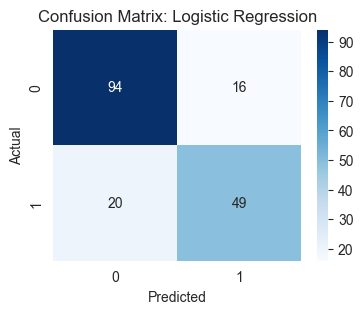

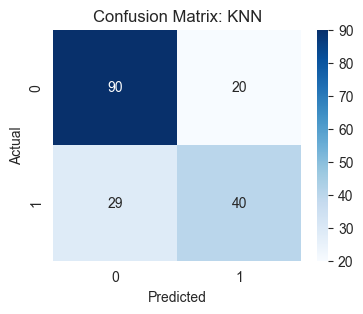

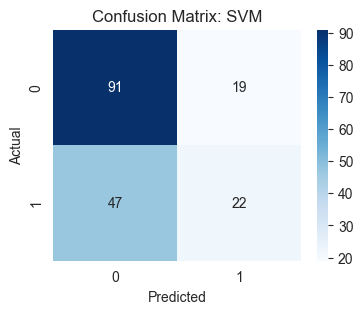

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [140]:
logreg_params = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['liblinear', 'lbfgs']
}

logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

logreg_grid = GridSearchCV(logreg_pipe, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)
print("Best Logistic Regression:", logreg_grid.best_params_)

knn_params = {
    'clf__n_neighbors': list(range(3, 21, 2)),
    'clf__weights': ['uniform', 'distance']
}

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
print("Best KNN:", knn_grid.best_params_)

svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__gamma': ['scale', 'auto']
}

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True))
])

svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
print("Best SVM:", svm_grid.best_params_)

tree_params = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)
print("Best Decision Tree:", tree_grid.best_params_)
nb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

nb_pipe.fit(X_train, y_train)  # No tuning needed


Best Logistic Regression: {'clf__C': 0.1, 'clf__solver': 'liblinear'}
Best KNN: {'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Best SVM: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best Decision Tree: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 10}


,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,priors,None
,var_smoothing,1e-09


In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": logreg_grid.best_estimator_,
    "KNN": knn_grid.best_estimator_,
    "SVM": svm_grid.best_estimator_,
}

for name, model in models.items():
    print("="*60)
    print(f"Model: {name}")
    y_pred = model.predict(X_val)

    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Model: Logistic Regression
Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[94 16]
 [18 51]]
Model: KNN
Accuracy: 0.7933
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[96 14]
 [23 46]]
Model: SVM
Accuracy: 0.8268
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86

In [142]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_grid.best_estimator_),
        ('logreg', logreg_grid.best_estimator_),
        ('knn', knn_grid.best_estimator_)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_val)

print("Voting Classifier Accuracy:", accuracy_score(y_val, y_pred_voting))
print("Classification Report:\n", classification_report(y_val, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_voting))


Voting Classifier Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       110
           1       0.79      0.80      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[95 15]
 [14 55]]


In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define base learners
base_learners = [
    ('svm', svm_grid.best_estimator_),
    ('logreg', logreg_grid.best_estimator_),
    ('knn', knn_grid.best_estimator_)
]

# Define meta-learner
meta_learner = LogisticRegression(max_iter=1000)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False
)

# Fit on training data
stacking_clf.fit(X_train, y_train)

# Predict on validation set
y_pred = stacking_clf.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.8547486033519553
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       110
           1       0.82      0.80      0.81        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179

Confusion Matrix:
 [[98 12]
 [14 55]]


In [144]:
!pip install lightgbm


In [145]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [146]:
boosting_models = {
    'LightGBM': LGBMClassifier(random_state=42),
}

for name, model in boosting_models.items():
    print("="*60)
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Model: LightGBM
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [147]:
from sklearn.model_selection import cross_val_score

for name, model in boosting_models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [148]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define full stacking base learners
base_learners = [
    ('logreg', logreg_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_),
    ('knn', knn_grid.best_estimator_),
    ('lgbm', LGBMClassifier(random_state=42))
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000)

# Final StackingClassifier
final_stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False
)

# Fit
final_stack.fit(X_train, y_train)

# Predict
y_pred = final_stack.predict(X_val)

# Evaluate
print("FINAL STACKED MODEL RESULTS")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [151]:
test=pd.read_csv('/Users/ASUS/PycharmProjects/JupyterProject1/titanic (1)/test.csv')

In [152]:
# Save PassengerId BEFORE merging or dropping columns
test_passenger_ids = test['PassengerId'].copy()


In [153]:
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': final_predictions.astype(int)
})
submission.to_csv('submission.csv', index=False)
